In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [34]:
# Read data
X = pd.read_csv('DATA\\X_data.csv')
y = pd.read_csv('DATA\\y_data.csv').values.ravel()

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2111, 23), y shape: (2111,)


In [35]:
# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [36]:
# Split data

# 4:1
X_train_4_1, X_test_4_1, y_train_4_1, y_test_4_1 = train_test_split(X, y, test_size=0.2, random_state=42)

# 7:3
X_train_7_3, X_test_7_3, y_train_7_3, y_test_7_3 = train_test_split(X, y, test_size=0.3, random_state=42)

# 6:4
X_train_6_4, X_test_6_4, y_train_6_4, y_test_6_4 = train_test_split(X, y, test_size=0.4, random_state=42)


In [37]:
# Standardize data for each split

X_train_4_1 = scaler.fit_transform(X_train_4_1)
X_test_4_1 = scaler.transform(X_test_4_1)

X_train_7_3 = scaler.fit_transform(X_train_7_3)
X_test_7_3 = scaler.transform(X_test_7_3)

X_train_6_4 = scaler.fit_transform(X_train_6_4)
X_test_6_4 = scaler.transform(X_test_6_4)


[0.8033413516408267, 0.8009709760679857, 0.7849753305357049, 0.7654223658104051, 0.7506154197320598, 0.7358084736537145, 0.7275156708162871, 0.7138886450230891, 0.7150773444770249, 0.7109318209751901, 0.7115217811177639, 0.7044124102329992, 0.7038206942566678, 0.6967165908731762, 0.6961178515618142, 0.6943391919653047, 0.6872333327480554, 0.683086053412463, 0.6789387740768704, 0.670645971239443]
Best k: 2, Best accuracy: 0.8033413516408267


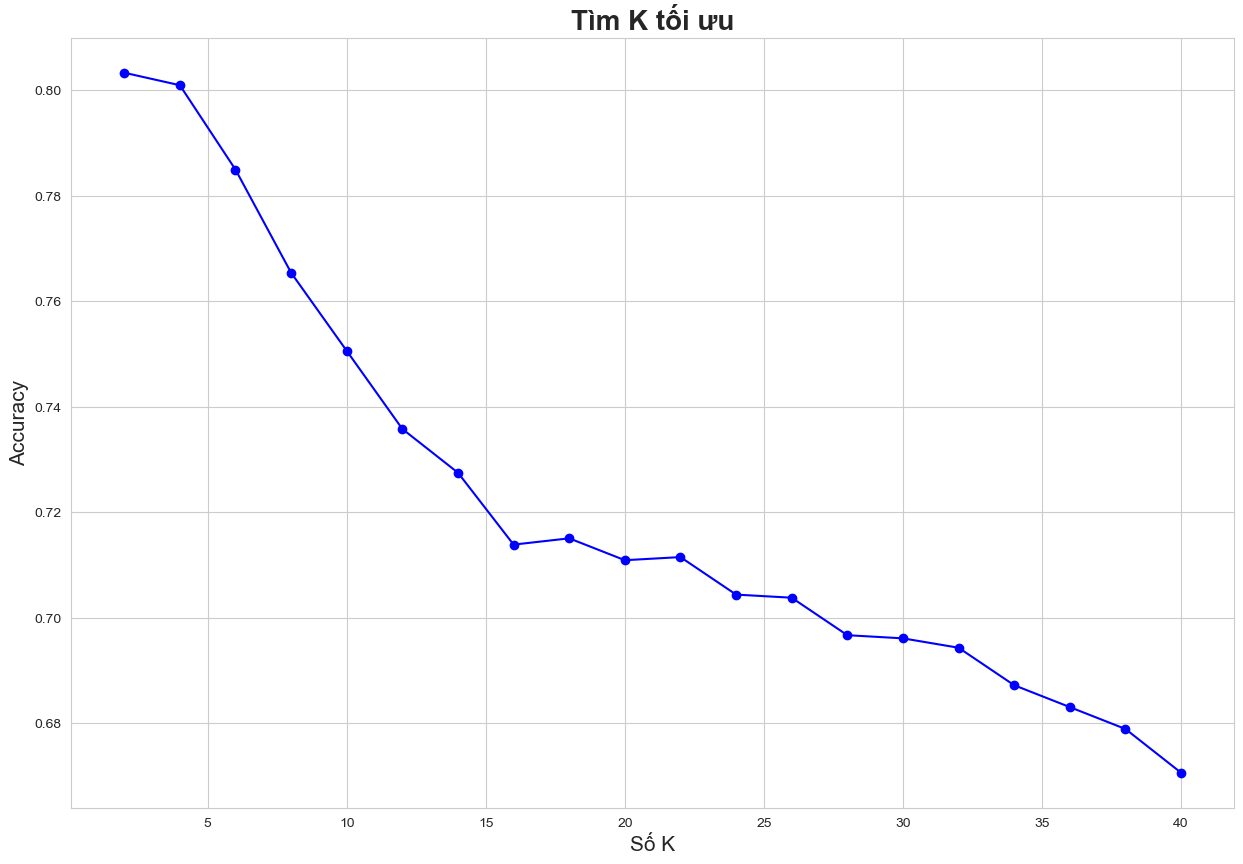

In [50]:
# Find k optimal value using k-fold cross validation
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

k_values = range(2, int(math.sqrt(len(X_train_4_1))), 2) 
kf = KFold(n_splits=5)  
mean_accuracies = []

for k in k_values:
    accuracies = []
    for train_index, test_index in kf.split(X_train_4_1):
        X_train, X_test = X_train_4_1[train_index], X_train_4_1[test_index]
        y_train, y_test = y_train_4_1[train_index], y_train_4_1[test_index]

        my_clf = KNeighborsClassifier(n_neighbors=k)
        my_clf.fit(X_train, y_train)
        y_pred = my_clf.predict(X_test)

        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)

    mean_accuracies.append(np.mean(accuracies))

best_k = k_values[np.argmax(mean_accuracies)]
best_accuracy = np.max(mean_accuracies)

print(mean_accuracies)

plt.figure(figsize=(15, 10))
plt.title('Tìm K tối ưu', fontsize=20, fontweight='bold')
plt.xlabel('Số K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_values, mean_accuracies, marker='o', linestyle='-', color='b')
print(f"Best k: {best_k}, Best accuracy: {best_accuracy}")

In [47]:
# Train model with best k value

my_clf = KNeighborsClassifier(n_neighbors=best_k)
my_clf.fit(X_train_4_1, y_train_4_1)
y_pred = my_clf.predict(X_test_4_1)

accuracy = accuracy_score(y_test_4_1, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8132387706855791
